<a href="https://colab.research.google.com/github/rachlllg/Project_Bird-Song-Classifier-with-Machine-Learning/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
# For drive access
from google.colab import drive
drive.mount('/content/drive')

# Standard libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt

# For audio files
import librosa
from IPython.display import Audio

Mounted at /content/drive


# Load train data csv file

In [2]:
df = pd.read_csv('/content/drive/MyDrive/project/clean_train_df_w_npy.csv')

df.head()

,primary_label,type,latitude,longitude,rating,filename,duration,country,continent,filename_npy
0,comsan,call,50.7542,4.5672,4.0,comsan/XC587730.ogg,5.746937,BE,EUROPE,comsan/XC587730.npy
1,eaywag1,call,69.3585,88.2378,3.0,eaywag1/XC675944.ogg,5.355000,RU,EUROPE,eaywag1/XC675944.npy
2,comsan,call,41.1698,0.9761,5.0,comsan/XC664012.ogg,10.488000,ES,EUROPE,comsan/XC664012.npy
3,barswa,call,NaN,NaN,2.5,barswa/XC268804.ogg,76.538813,UNKNOWN,UNKNOWN,barswa/XC268804.npy
4,barswa,song,53.9299,-2.9833,2.5,barswa/XC690498.ogg,83.095500,GB,EUROPE,barswa/XC690498.npy


In [3]:
example = np.load('/content/drive/MyDrive/project/train_npy/' + df['filename_npy'].iloc[0])
example

array([-2.3946195e-06, -6.3855114e-06, -1.4239242e-05, ...,
       -7.7737495e-05,  3.6705611e-04, -1.1233051e-04], dtype=float32)

In [4]:
Audio(example, rate=16000)

# define function to visualize

In [5]:
def visualize_audio(audio, xlim, sr=16000):
  fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10), sharex=True)

  # plot1: soundwave
  librosa.display.waveshow(audio, sr=sr, ax=axes[0][0])
  axes[0][0].set_title('Soundwave')
  axes[0][0].set_ylabel('Amplitude')
  axes[0][0].set_xlabel('')

  # plot2: log scale melspectogram
  power_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
  S_dB = librosa.power_to_db(power_spectrogram, ref=np.max)
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[1][0])
  axes[1][0].set_title('Log Scale Melspectrogram')
  axes[1][0].set_xlabel('')

  # plot3: mfcc
  mfcc = librosa.feature.mfcc(y=audio, sr=sr)
  librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[2][0])
  axes[2][0].set_title('MFCC')
  axes[2][0].set_xlabel('')

  # plot4: chroma
  chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
  librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', ax=axes[0][1])
  axes[0][1].set_title('Chroma')
  axes[0][1].set_xlabel('')

  # plot5: RMS energy
  rms = librosa.feature.rms(y=audio)
  times = librosa.times_like(rms, sr=sr)
  axes[1][1].plot(times, rms[0])
  axes[1][1].set_title('RMS Energy')
  axes[1][1].set_ylabel('RMS')

  # plot6: Spectral Centroid
  sc = librosa.feature.spectral_centroid(y=audio, sr=sr)
  axes[2][1].plot(times, sc.T)
  axes[2][1].set_title('Spectral Centroid')
  axes[2][1].set_ylabel('Hz')

  plt.tight_layout()

  axes[2][1].set_xlabel('Time')
  axes[2][0].set_xlabel('Time')

  plt.xlim(0,xlim)

  plt.show()

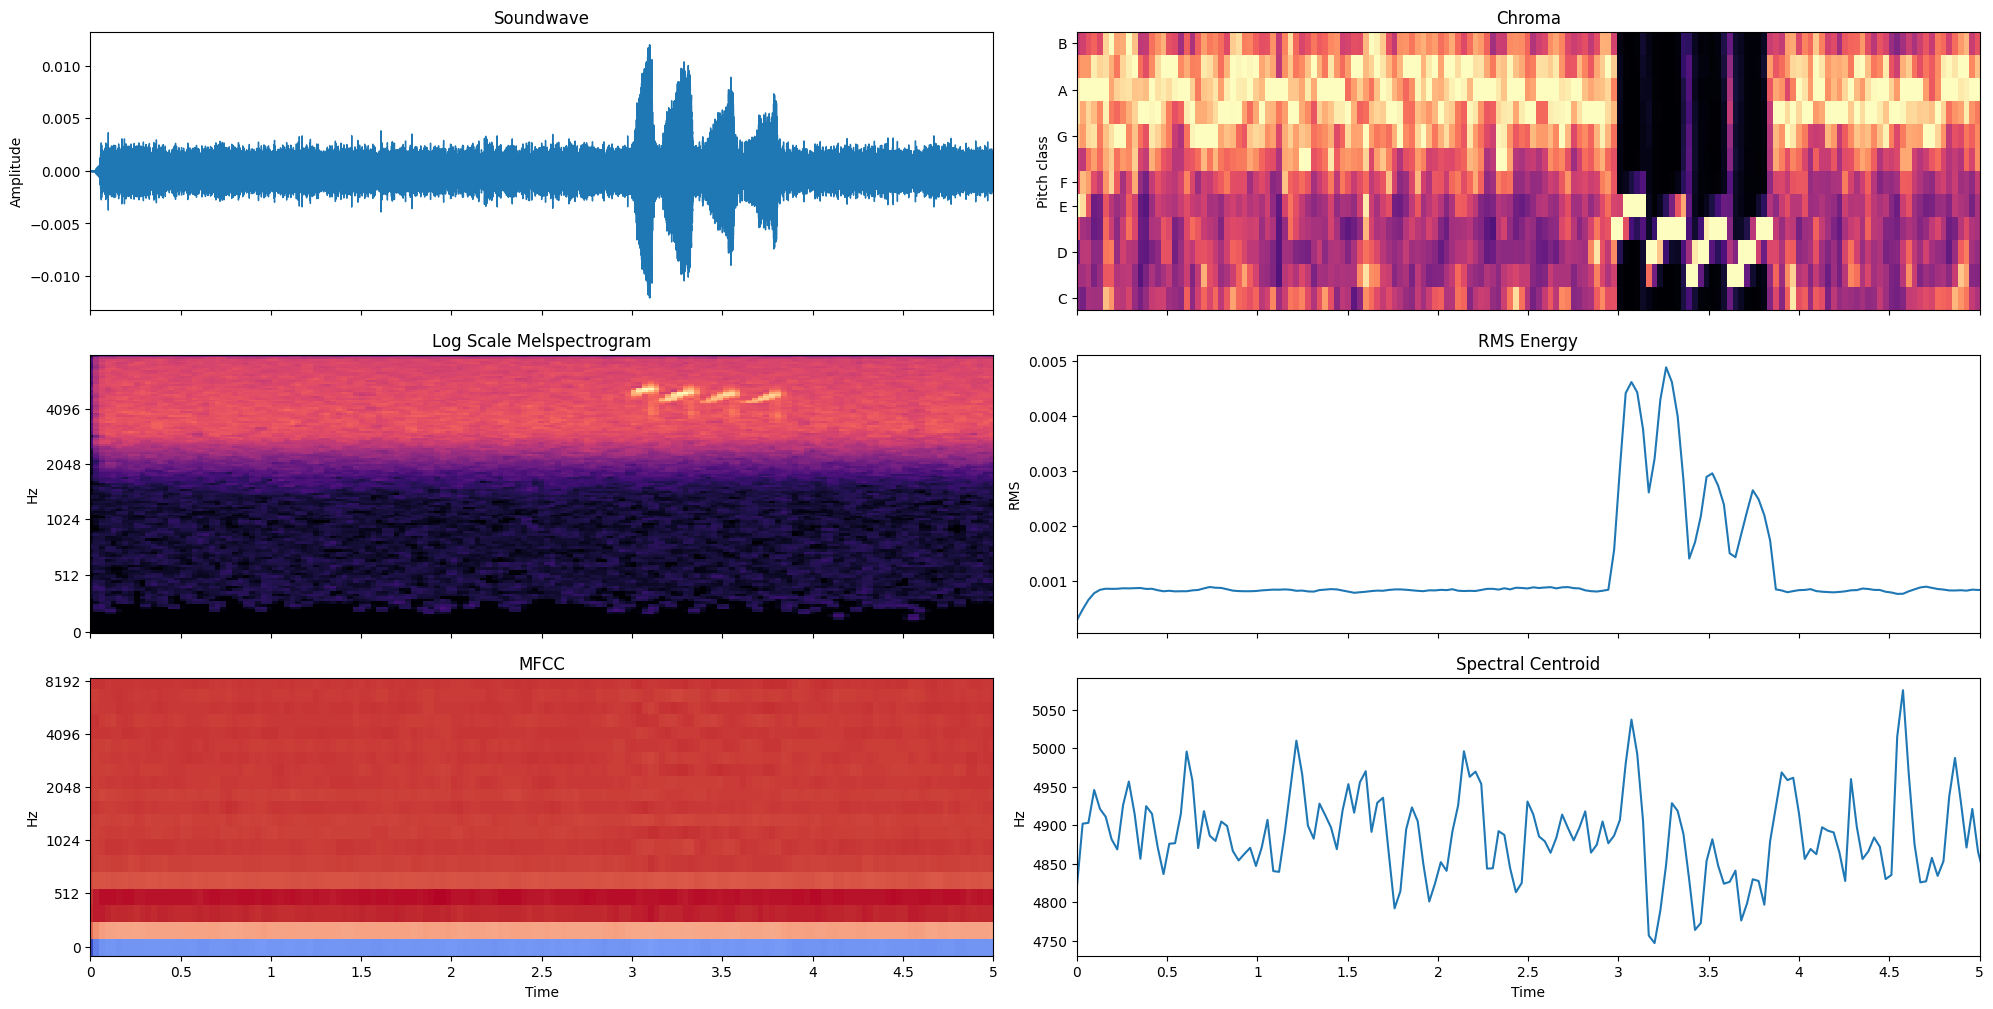

In [6]:
visualize_audio(example, xlim=5)

# For website

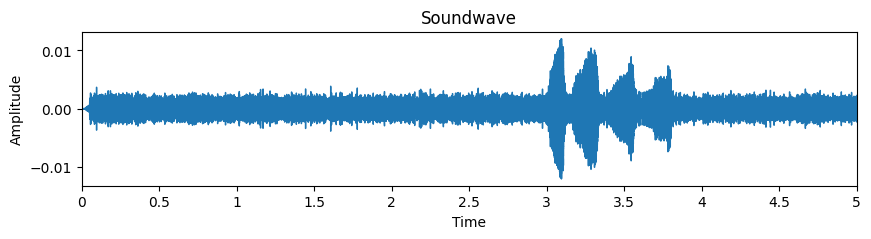

In [14]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (10,2))

# plot1: soundwave
librosa.display.waveshow(example, sr=16000)
plt.title('Soundwave')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(0,5)

plt.show()

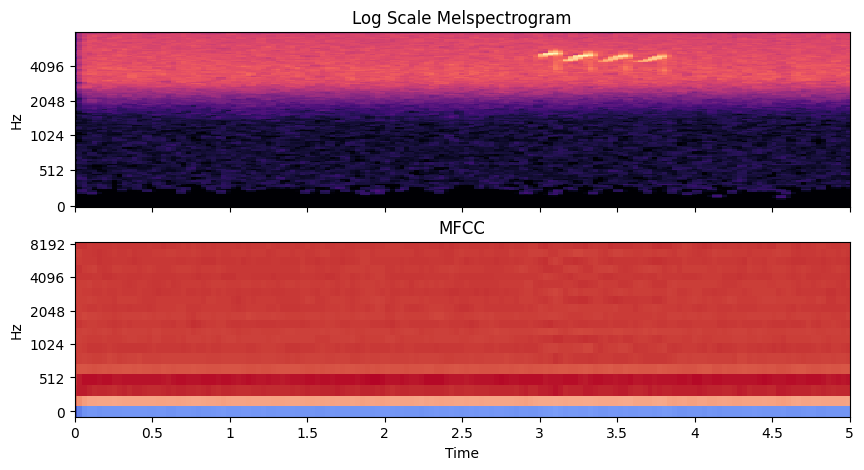

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,5), sharex=True)

# plot2: log scale melspectogram
power_spectrogram = librosa.feature.melspectrogram(y=example, sr=16000)
S_dB = librosa.power_to_db(power_spectrogram, ref=np.max)
librosa.display.specshow(S_dB, sr=16000, x_axis='time', y_axis='mel', fmax=8000, ax=axes[0])
axes[0].set_title('Log Scale Melspectrogram')
axes[0].set_xlabel('')

# plot3: mfcc
mfcc = librosa.feature.mfcc(y=example, sr=16000)
librosa.display.specshow(mfcc, sr=16000, x_axis='time', y_axis='mel', fmax=8000, ax=axes[1])
axes[1].set_title('MFCC')
axes[1].set_xlabel('Time')

plt.xlim(0,5)

plt.show()

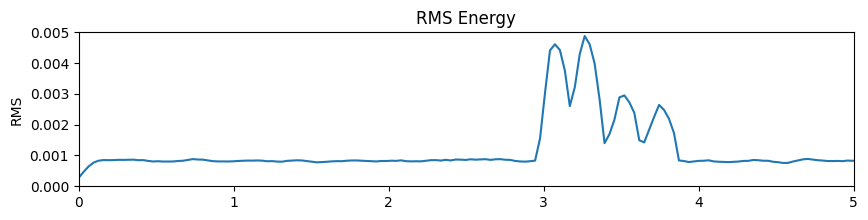

In [22]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (10,2))

# plot5: RMS energy
rms = librosa.feature.rms(y=example)
times = librosa.times_like(rms, sr=16000)
plt.plot(times, rms[0])
plt.title('RMS Energy')
plt.ylabel('RMS')

plt.xlim(0,5)
plt.ylim(0,0.005)

plt.show()

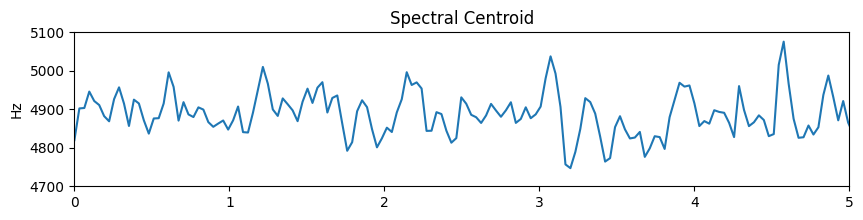

In [27]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (10,2))

# plot6: Spectral Centroid
sc = librosa.feature.spectral_centroid(y=example, sr=16000)
plt.plot(times, sc.T)
plt.title('Spectral Centroid')
plt.ylabel('Hz')

plt.xlim(0,5)
plt.ylim(4700,5100)

plt.show()

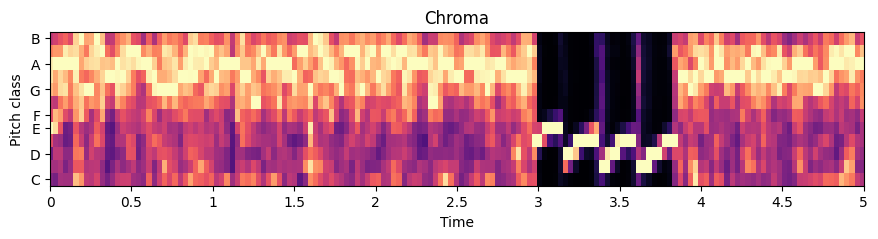

In [20]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (10.5,2))

# plot4: chroma
chroma = librosa.feature.chroma_stft(y=example, sr=16000)
librosa.display.specshow(chroma, sr=16000, x_axis='time', y_axis='chroma')
plt.title('Chroma')
plt.xlabel('Time')
plt.xlim(0,5)

plt.show()